In [1]:
#import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step 1: Load and Inspect the Data

First, let's load the dataset and inspect the first few rows to understand its structure.

In [2]:
#load dataset
df = pd.read_csv("../data/raw_analyst_ratings.csv")
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
df.shape

(1407328, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [5]:
df.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [6]:
df.isna().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

From the above we can see that there is no missing value in each attrbutes. 

In [7]:
df.head(15)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


Step 2: Perform Descriptive Statistics

2.1. Basic Statistics for Textual Lengths

Calculate the length of each headline to get an idea of the distribution.

In [8]:
# Calculate headline length
df['headline_length'] = df['headline'].apply(len)

# Basic statistics for headline length
headline_length_stats = df['headline_length'].describe()
print(headline_length_stats)


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In the dataset used in this project, the average length of a headline is about 7.3 characters.
The shortest headline is 3 characters, while the longest is 5.12 characters.

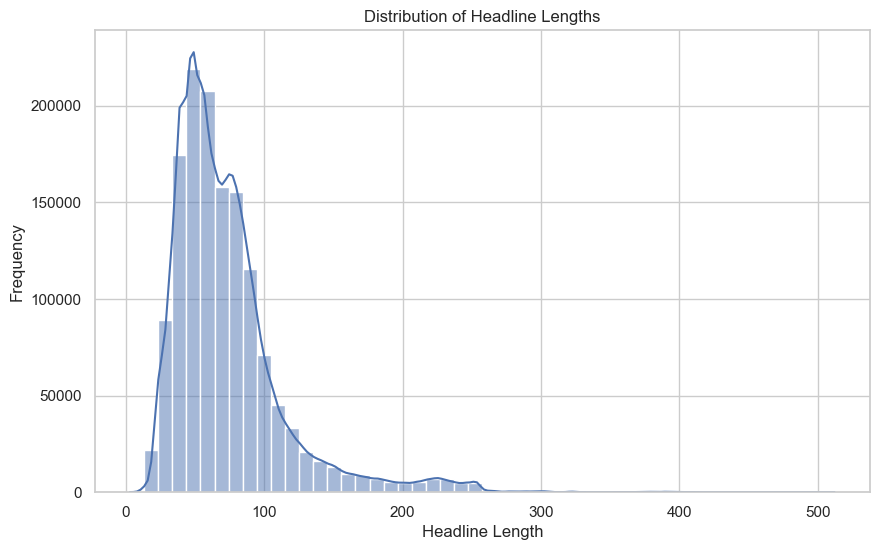

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Histogram of headline lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=50, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()


2.2. Count Articles per Publisher

Identify which publishers are the most active by counting the number of articles they have published.

C:\Users\getac\AppData\Local\Temp\ipykernel_8384\465350416.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.index, y=top_publishers.values, palette="viridis")


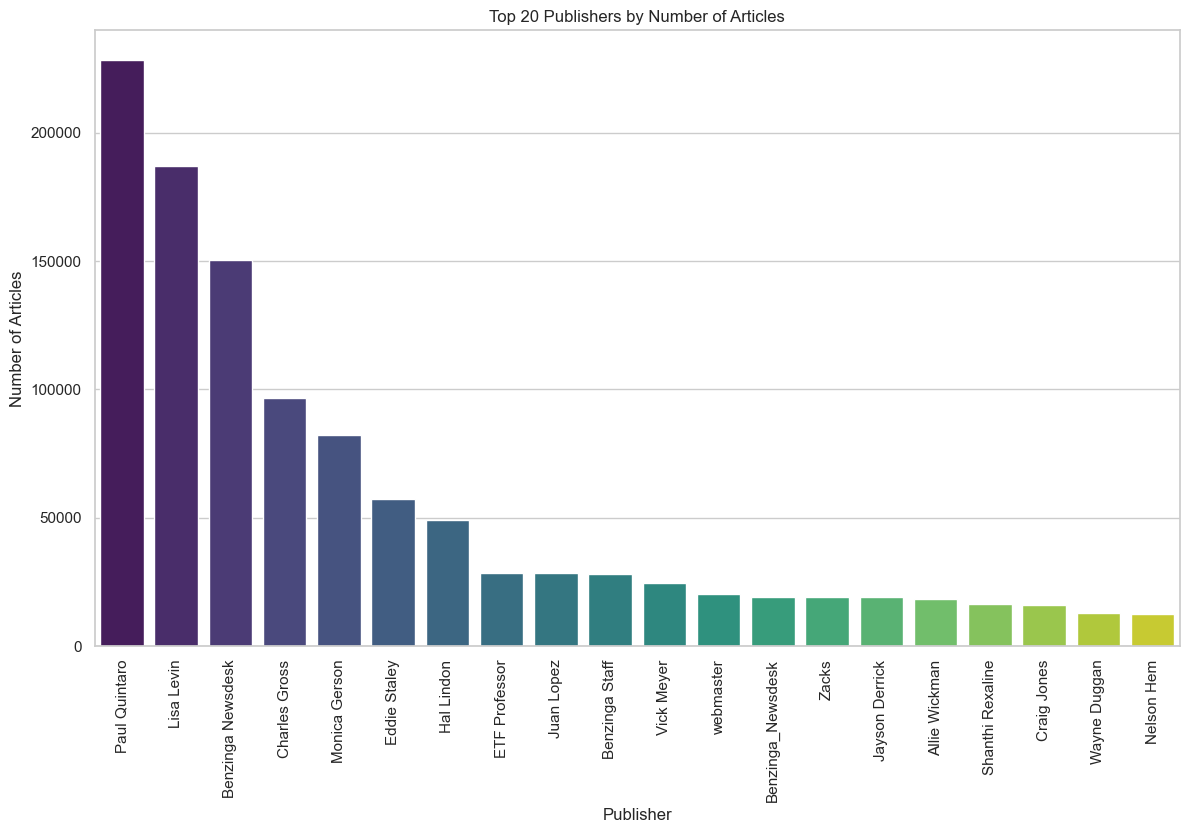

In [10]:
# Top 20 publishers by article count
top_publishers = df['publisher'].value_counts().head(20)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Top 20 Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()


In [11]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()
print(publisher_counts)


publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


The Paul Quintaro, Lisa Levin, and Benzinga Newsdesk  are the top three publisher are the most active article publishers while the Shazir Mucklai, Laura Jennings, Eric Martin, ose Rodrigo, Jeremie Capron are not active article publisher because they are only participated on each publishing a single article.

2.3. Analyze Publication Dates

Examine the publication dates to identify trends over time.

In [12]:
# Check the length of the date strings
df['date_length'] = df['date'].apply(len)
print(df['date_length'].value_counts())


date_length
19    1351341
25      55987
Name: count, dtype: int64


In [13]:
# Truncate the 'date' column to a length of 20 characters
df['date'] = df['date'].str.slice(0, 19)

# Display the first 15 rows
df.head(15)


,Unnamed: 0,headline,url,publisher,date,stock,headline_length,date_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54,A,39,25
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20,A,42,25
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07,A,29,25
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06,A,44,25
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59,A,87,25
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25,A,71,25
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20,A,73,25
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04,A,120,25
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59,A,84,25
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17,A,42,25


In [14]:
print(df['date'].head(20))

0     2020-06-05 10:30:54
1     2020-06-03 10:45:20
2     2020-05-26 04:30:07
3     2020-05-22 12:45:06
4     2020-05-22 11:38:59
5     2020-05-22 11:23:25
6     2020-05-22 09:36:20
7     2020-05-22 09:07:04
8     2020-05-22 08:37:59
9     2020-05-22 08:06:17
10    2020-05-22 00:00:00
11    2020-05-22 00:00:00
12    2020-05-21 00:00:00
13    2020-05-21 00:00:00
14    2020-05-21 00:00:00
15    2020-05-21 00:00:00
16    2020-05-18 00:00:00
17    2020-05-16 00:00:00
18    2020-05-15 00:00:00
19    2020-05-08 00:00:00
Name: date, dtype: object


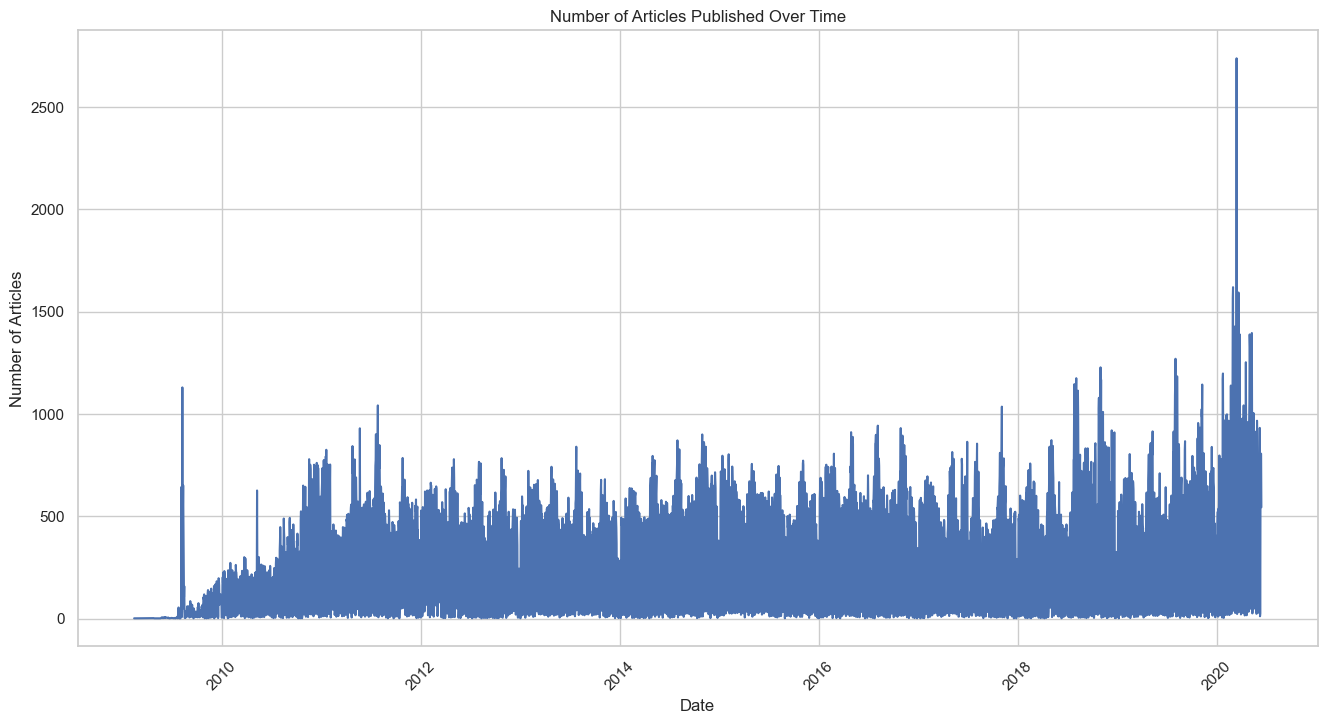

In [15]:
# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the date and hour for analysis
df['date_only'] = df['date'].dt.date
df['hour'] = df['date'].dt.hour

# Count articles by date
date_counts = df['date_only'].value_counts().sort_index()

# Plotting the number of articles over time
plt.figure(figsize=(16, 8))
sns.lineplot(x=date_counts.index, y=date_counts.values)
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

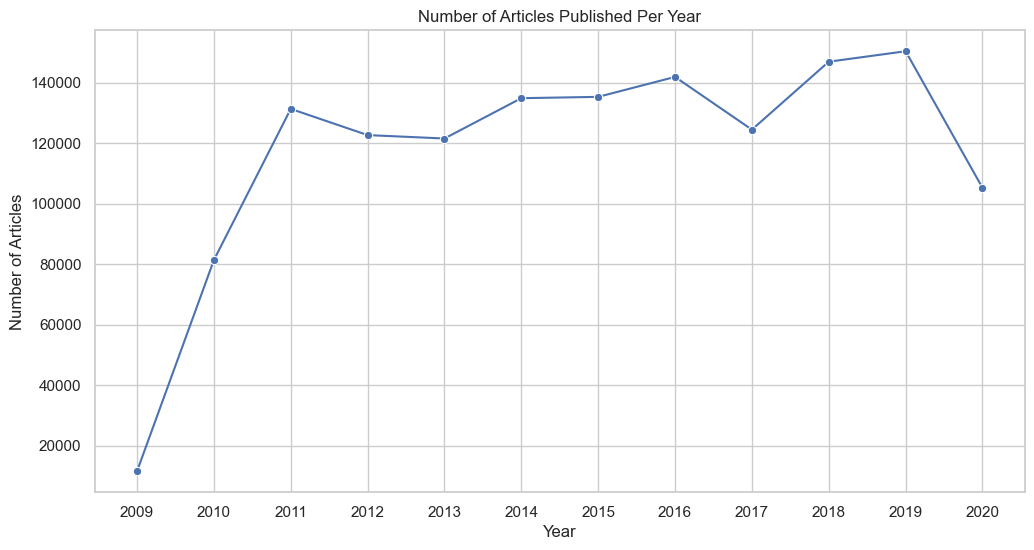

In [16]:
# Extract the year from the date
df['year'] = df['date'].dt.year

# Count the number of articles per year
articles_per_year = df['year'].value_counts().sort_index()

# Plotting the number of articles per year
plt.figure(figsize=(12, 6))
sns.lineplot(x=articles_per_year.index, y=articles_per_year.values, marker='o')
plt.title('Number of Articles Published Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(articles_per_year.index)  # Ensure all years are shown on the x-axis
plt.grid(True)
plt.show()

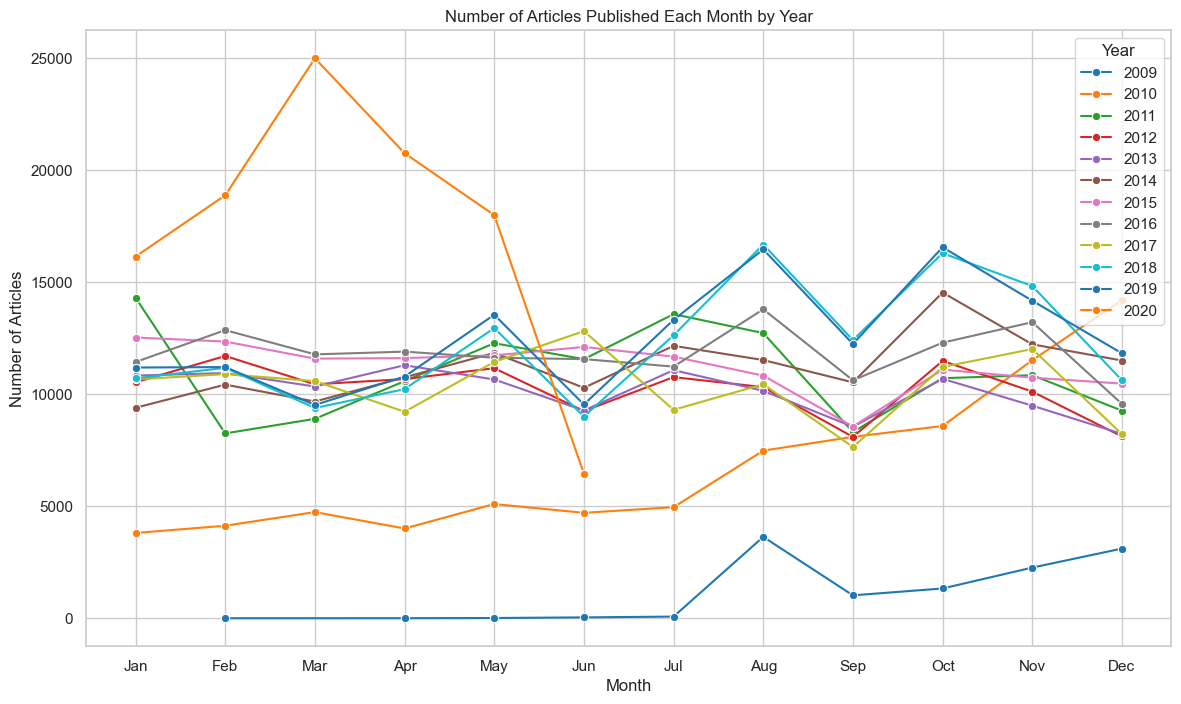

In [17]:
#Extract year and month from the date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Count the number of articles per year and month
articles_per_month = df.groupby(['year', 'month']).size().reset_index(name='count')

# Plotting the number of articles per month for each year
plt.figure(figsize=(14, 8))
sns.lineplot(data=articles_per_month, x='month', y='count', hue='year', marker='o', palette='tab10')
plt.title('Number of Articles Published Each Month by Year')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()

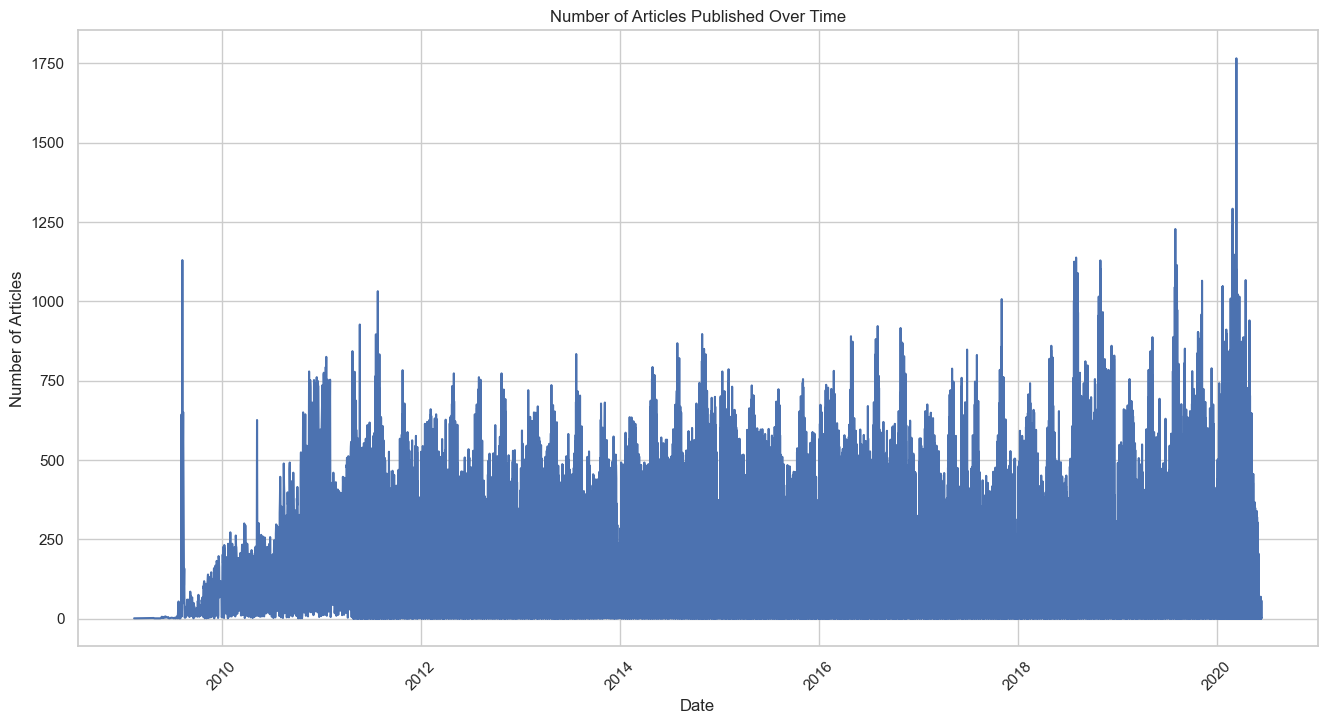

In [18]:
# Count the number of articles per date
articles_per_date = df['date'].value_counts().sort_index()

# Convert to DataFrame for plotting
articles_per_date_df = articles_per_date.reset_index()
articles_per_date_df.columns = ['date', 'count']

# Plotting the number of articles over time
plt.figure(figsize=(16, 8))
sns.lineplot(data=articles_per_date_df, x='date', y='count')
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

The output will be a line graph that visually represents the number of articles published over time.In the date 2020-06-08, 2020-06-09, 2020-06-10, 2020-06-11 are the highest article published, indicating higher activity on that day. This allows you to identify trends, such as periods of increased or decreased publication activity, which could correlate with specific market events or news cycles. 

Step 3: Text Analysis

3.1. Sentiment Analysis

Perform sentiment analysis on the headlines to gauge the sentiment.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import re


In [27]:
nltk.download('punkt')
nltk.download('stopwords')
print(nltk.data.path)
import nltk
nltk.data.path.append('C:\\Users\\getac\\AppData\\Roaming\\nltk_data')




['C:\\Users\\getac/nltk_data', 'c:\\Users\\getac\\anaconda3\\envs\\env_week2\\nltk_data', 'c:\\Users\\getac\\anaconda3\\envs\\env_week2\\share\\nltk_data', 'c:\\Users\\getac\\anaconda3\\envs\\env_week2\\lib\\nltk_data', 'C:\\Users\\getac\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\getac\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\getac\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
# Drop the unnamed column if it exists
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
# Extract headline column for analysis
headlines = df['headline'].dropna().tolist()

3.2 Preprocess the Text

Clean the text data by removing stopwords, special characters, and converting to lowercase.

In [30]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Preprocess the headlines
preprocessed_headlines = [preprocess_text(headline) for headline in headlines]


3.3 Sentiment Analysis

Use the SentimentIntensityAnalyzer from NLTK to determine the sentiment of each headline.

In [32]:
# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment
sentiments = [sia.polarity_scores(headline)['compound'] for headline in preprocessed_headlines]

# Define custom sentiment classification
def classify_custom_sentiment(score):
    if score <= -0.5:
        return 'Very Negative'
    elif score <= -0.0001:
        return 'Negative'
    elif score < 0.5:
        return 'Neutral'
    elif score < 1:
        return 'Positive'
    else:
        return 'Very Positive'

df['sentiment'] = sentiments
df['sentiment_class'] = df['sentiment'].apply(classify_custom_sentiment)

# Show sample sentiment analysis
print(df[['headline', 'url', 'publisher', 'date', 'stock', 'sentiment', 'sentiment_class']].head(10))


                                            headline  \
0            Stocks That Hit 52-Week Highs On Friday   
1         Stocks That Hit 52-Week Highs On Wednesday   
2                      71 Biggest Movers From Friday   
3       46 Stocks Moving In Friday's Mid-Day Session   
4  B of A Securities Maintains Neutral on Agilent...   
5  CFRA Maintains Hold on Agilent Technologies, L...   
6  UBS Maintains Neutral on Agilent Technologies,...   
7  Agilent Technologies shares are trading higher...   
8  Wells Fargo Maintains Overweight on Agilent Te...   
9         10 Biggest Price Target Changes For Friday   

                                                 url                publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...        Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...        Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...               Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...       

In [33]:
# Show sample sentiment analysis
df[['headline', 'url', 'publisher', 'date', 'stock', 'sentiment', 'sentiment_class']].head(10)

,headline,url,publisher,date,stock,sentiment,sentiment_class
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54,A,0.000,Neutral
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20,A,0.000,Neutral
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07,A,0.000,Neutral
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06,A,0.000,Neutral
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59,A,0.296,Neutral
5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25,A,-0.128,Negative
6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20,A,0.000,Neutral
7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04,A,0.296,Neutral
8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59,A,-0.128,Negative
9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17,A,0.000,Neutral


C:\Users\getac\AppData\Local\Temp\ipykernel_8384\3525179747.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_class', data=df, palette='viridis')


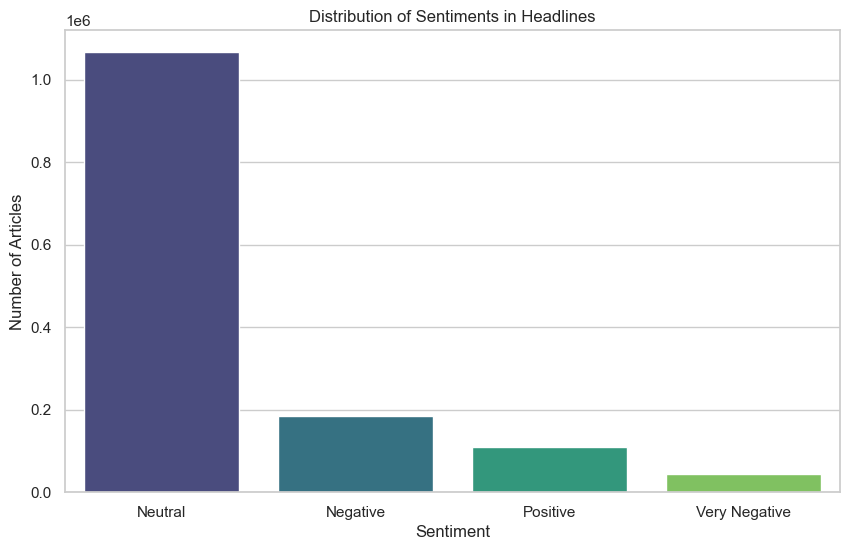

In [34]:
#Plot the distribution of the custom sentiment classes.
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_class', data=df, palette='viridis')
plt.title('Distribution of Sentiments in Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.show()


6. Keyword Extraction
Extract keywords and phrases using TF-IDF vectorization.

In [35]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(preprocessed_headlines)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Sum the TF-IDF scores for each word
sum_words = X.sum(axis=0)
word_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

# Display top 10 keywords
top_keywords = word_freq[:10]
print("Top 10 Keywords:")
for word, freq in top_keywords:
    print(f"{word}: {freq}")


Top 10 Keywords:
stocks: 43648.06489202377
vs: 36863.96194842729
est: 33935.78632888293
eps: 29322.054243922477
reports: 28199.47602489701
earnings: 27523.961645040687
benzingas: 27311.555744733556
market: 26554.664469951967
shares: 25866.019256437907
update: 24805.186153101997


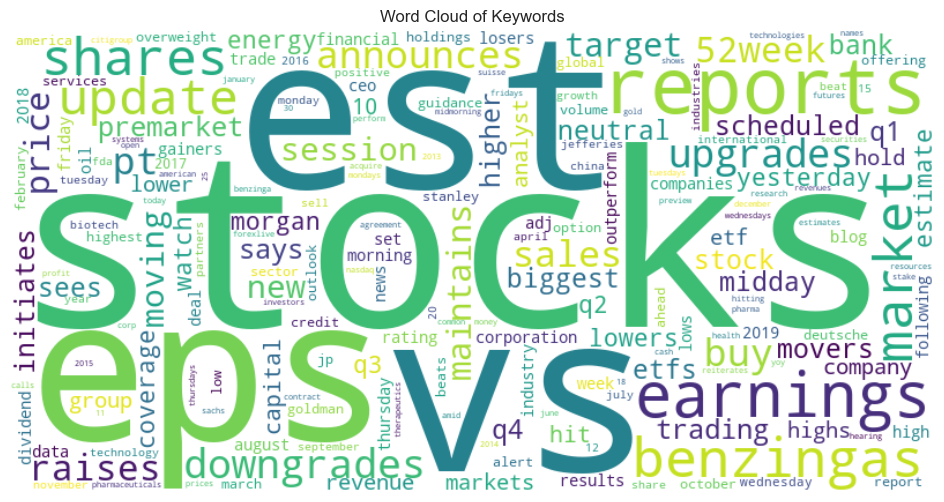

C:\Users\getac\AppData\Local\Temp\ipykernel_8384\1129961119.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words, y=top_freqs, palette='viridis')


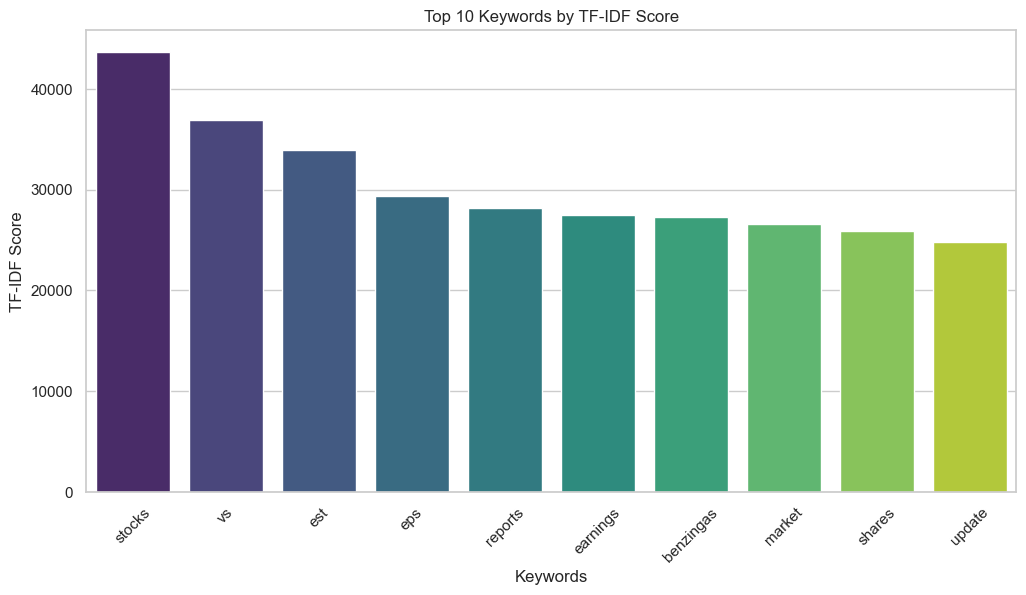

In [37]:
# Word Cloud for Top Keywords
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_freq))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Keywords')
plt.show()

# Plot Top 10 Keywords Frequencies
top_words, top_freqs = zip(*top_keywords)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_words, y=top_freqs, palette='viridis')
plt.title('Top 10 Keywords by TF-IDF Score')
plt.xlabel('Keywords')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45)
plt.show()


7. Topic Modeling
Perform topic modeling using Latent Dirichlet Allocation (LDA).

In [36]:
# Initialize LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display top words per topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, feature_names, 10)


Topic #0:
stocks 52week session moving shares hit premarket highs new analyst
Topic #1:
benzingas earnings market scheduled watch upgrades downgrades gainers losers etf
Topic #2:
says announces deal reports etfs ceo new biotech fda agreement
Topic #3:
pt buy maintains raises target price announces downgrades neutral initiates
Topic #4:
vs est eps reports sales sees q4 q1 estimate q2


8. Generate Word Cloud
Visualize the most common words in the headlines.

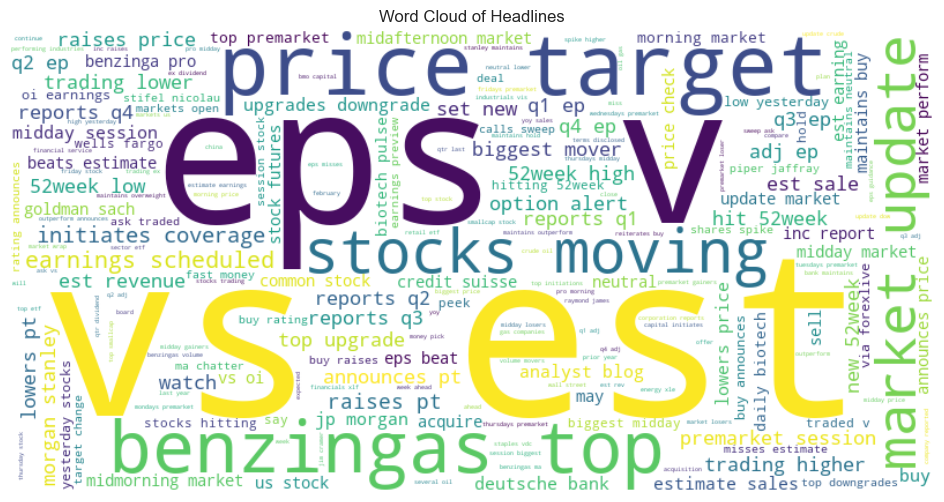

In [38]:
# Generate word cloud
text = ' '.join(preprocessed_headlines)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Headlines')
plt.show()


3. Time Series Analysis

Objective: Analyze how publication frequency varies over time and identify if there are specific times with increased article publication.

11.1 Publication Frequency Over Time
Aggregate Data by Date

First, aggregate the data by day and count the number of articles published on each date.

In [40]:
# Aggregate by date and count articles
daily_article_counts = df.groupby(df['date'].dt.date).size()
daily_article_counts = daily_article_counts.reset_index(name='article_count')
daily_article_counts['date'] = pd.to_datetime(daily_article_counts['date'])


In [41]:
daily_article_counts['date']

0      2009-02-14
1      2009-04-27
2      2009-04-29
3      2009-05-22
4      2009-05-27
          ...    
3950   2020-06-07
3951   2020-06-08
3952   2020-06-09
3953   2020-06-10
3954   2020-06-11
Name: date, Length: 3955, dtype: datetime64[ns]

In [42]:
daily_article_counts

,date,article_count
0,2009-02-14,1
1,2009-04-27,2
2,2009-04-29,1
3,2009-05-22,1
4,2009-05-27,6
...,...,...
3950,2020-06-07,25
3951,2020-06-08,765
3952,2020-06-09,804
3953,2020-06-10,806


Plot the Publication Frequency

Create a time series plot to visualize how article publication frequency changes over time.

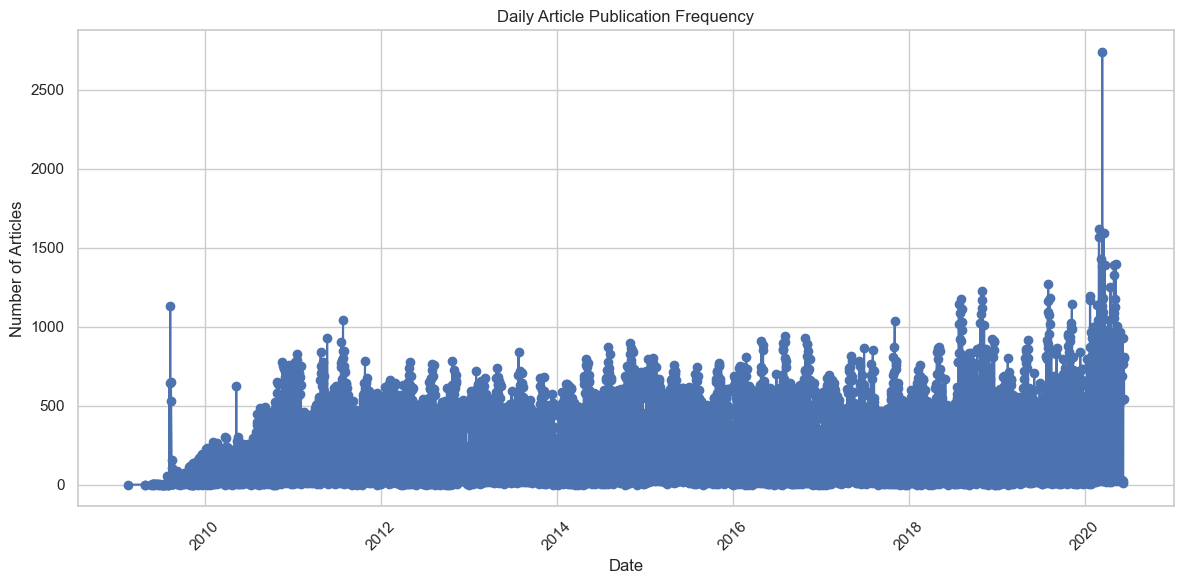

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(daily_article_counts['date'], daily_article_counts['article_count'], marker='o', linestyle='-', color='b')
plt.title('Daily Article Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Identify Spikes

Look for any notable spikes or changes in the publication frequency. You can add vertical lines or annotations for specific market events if you have that data.

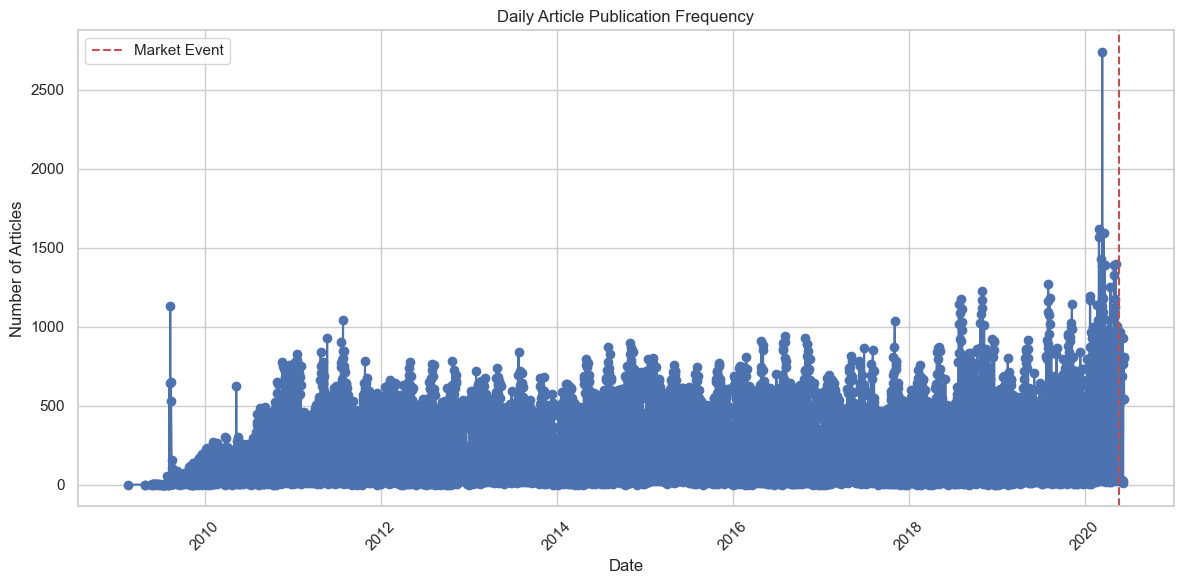

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(daily_article_counts['date'], daily_article_counts['article_count'], marker='o', linestyle='-', color='b')
plt.title('Daily Article Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.xticks(rotation=45)

# Example: Adding a vertical line for a specific date
plt.axvline(pd.Timestamp('2020-05-22'), color='r', linestyle='--', label='Market Event')
plt.legend()
plt.tight_layout()
plt.show()


11.2 Analysis of Publishing Times
Extract Hour and Day of Week

Extract the hour of the day and day of the week from the date column to analyze publishing patterns.

In [45]:
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.day_name()

df['hour'] 


0          10
1          10
2           4
3          12
4          11
           ..
1407323     0
1407324     0
1407325     0
1407326     0
1407327     0
Name: hour, Length: 1407328, dtype: int32

In [46]:
df['day_of_week']

0             Friday
1          Wednesday
2            Tuesday
3             Friday
4             Friday
             ...    
1407323       Monday
1407324    Wednesday
1407325      Tuesday
1407326      Tuesday
1407327     Thursday
Name: day_of_week, Length: 1407328, dtype: object

In [48]:
# Aggregate by hour and day of the week
hourly_article_counts = df.groupby('hour').size()
weekly_article_counts = df.groupby('day_of_week').size()
hourly_article_counts

hour
0     1351408
1          14
2          57
3          93
4        1469
5        1829
6        2476
7        5033
8        5527
9        5965
10       7669
11       5701
12       5732
13       2710
14       2075
15       1612
16       3939
17       2800
18        704
19        227
20        131
21         82
22         48
23         27
dtype: int64

In [49]:
weekly_article_counts

day_of_week
Friday       217892
Monday       265164
Saturday       7753
Sunday        16514
Thursday     302595
Tuesday      296470
Wednesday    300940
dtype: int64

Plot Hourly and Daily Trends

Create plots to visualize publishing patterns throughout the day and week.

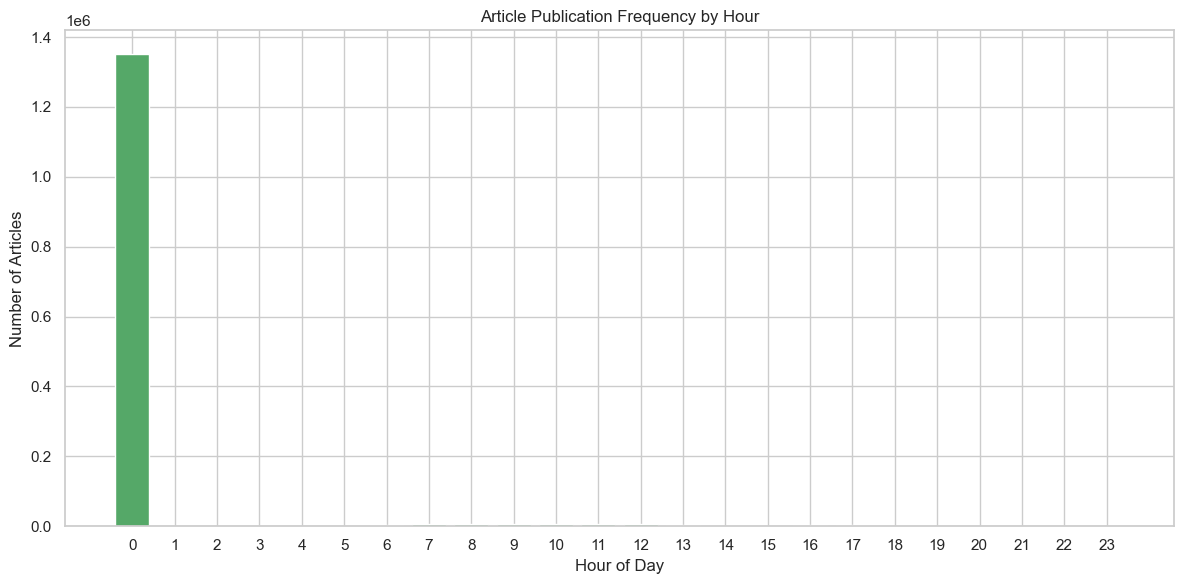

C:\Users\getac\AppData\Local\Temp\ipykernel_8384\3578305812.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_article_counts.index, y=weekly_article_counts.values, palette='viridis')


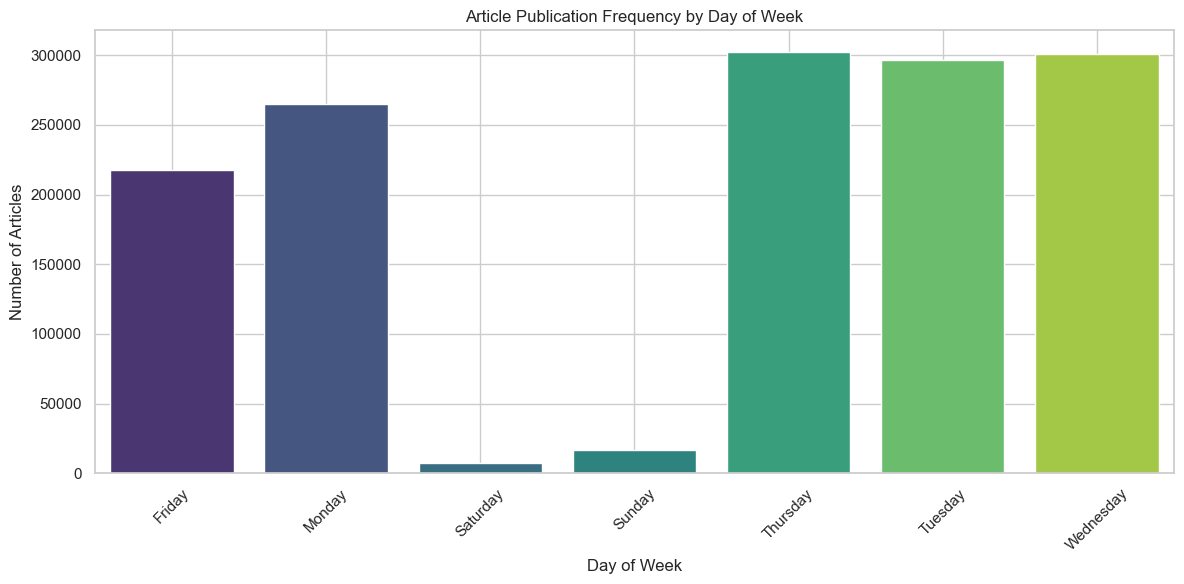

In [50]:
# Hourly Publication Frequency
plt.figure(figsize=(12, 6))
plt.bar(hourly_article_counts.index, hourly_article_counts.values, color='g')
plt.title('Article Publication Frequency by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Weekly Publication Frequency
plt.figure(figsize=(12, 6))
sns.barplot(x=weekly_article_counts.index, y=weekly_article_counts.values, palette='viridis')
plt.title('Article Publication Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


12. Publisher Analysis
Objective: Identify which publishers contribute most to the news feed and analyze if there's a pattern in the type of news reported.

12.1 Top Publishers
Count Articles per Publisher

Count the number of articles published by each publisher.

In [51]:
publisher_counts = df['publisher'].value_counts()
top_publishers = publisher_counts.head(10)
publisher_counts


publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64

In [52]:
top_publishers

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

Plot Top Publishers

Create a bar plot to visualize the top publishers by the number of articles.

C:\Users\getac\AppData\Local\Temp\ipykernel_8384\3110760033.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='viridis')


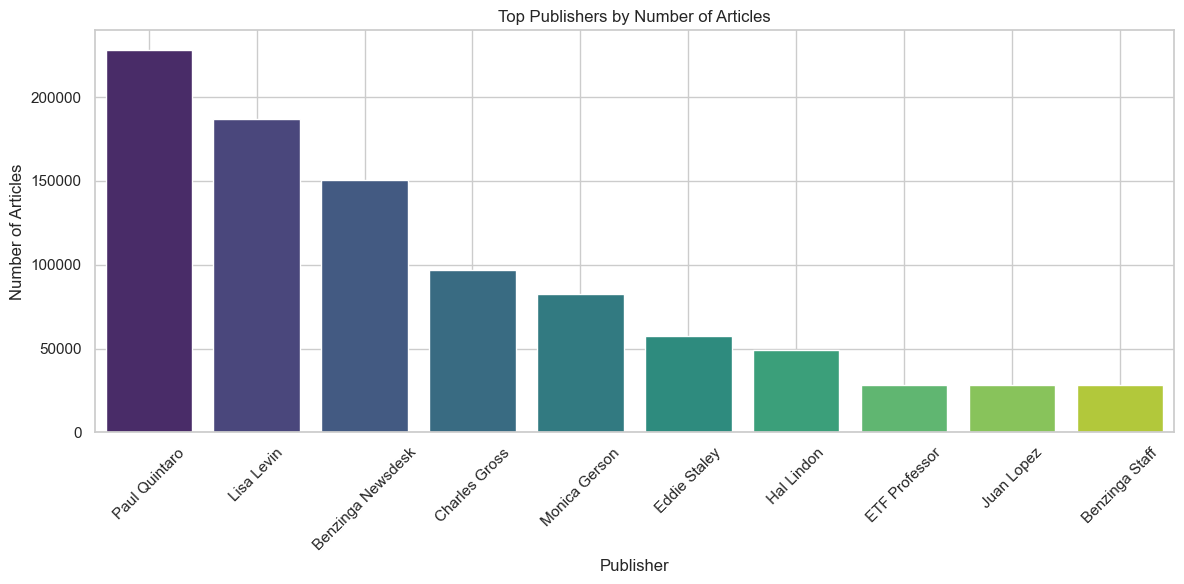

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='viridis')
plt.title('Top Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


12.2 Analyze Publisher Names
Extract Domains from Email Addresses

If publisher names are email addresses, extract the domains to analyze contributions from different organizations.

In [55]:
# Extract domains from email addresses
def extract_domain(email):
    return email.split('@')[-1] if '@' in email else 'N/A'

df['domain'] = df['publisher'].apply(extract_domain)
domain_counts = df['domain'].value_counts()
top_domains = domain_counts.head(10)
top_domains


domain
N/A                       1399240
benzinga.com                 7937
gmail.com                     139
andyswan.com                    5
investdiva.com                  2
tothetick.com                   2
eosdetroit.io                   1
forextraininggroup.com          1
stockmetrix.net                 1
Name: count, dtype: int64

Plot Top Domains

Create a bar plot to visualize the top domains by the number of articles.

C:\Users\getac\AppData\Local\Temp\ipykernel_8384\499663547.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_domains.index, y=top_domains.values, palette='viridis')


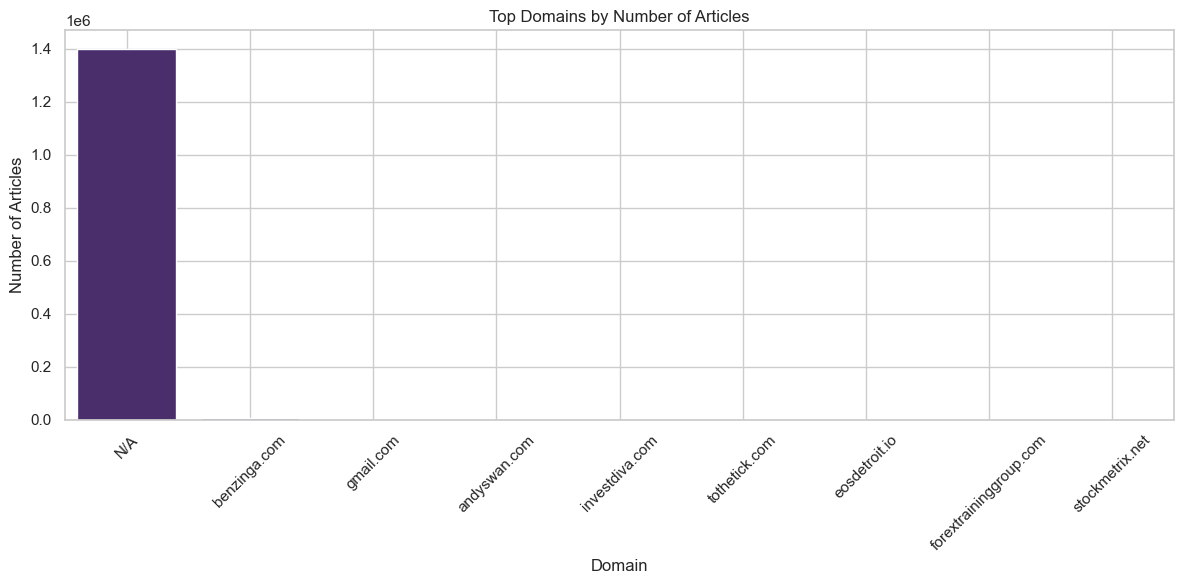

In [56]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_domains.index, y=top_domains.values, palette='viridis')
plt.title('Top Domains by Number of Articles')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
